First exploration of the data

In [2]:
import pandas as pd

path = '/content/drive/MyDrive/Masterarbeit/data/Baseline.xlsx'

df = pd.read_excel(path)
#show first 5 rows of the dataset
display(df.head())

#get information about the data and the features
display(df.describe())
display(df.info())

,Matrizenradius [mm ],Stempelkantenradius [mm],Blechdicke [mm],Platinenabmessung [mm],1/4 Niederhalterkraft [N],Ziehtiefe [mm],x_Einzug [mm]
0,6,10,2.45,2.0,33752,22,7.1570
1,6,10,2.45,2.0,33752,24,8.1830
2,6,10,2.45,2.0,33752,26,9.2785
3,6,10,2.45,2.0,37502,22,7.0560
4,6,10,2.45,2.0,37502,24,8.0880


,Matrizenradius [mm ],Stempelkantenradius [mm],Blechdicke [mm],Platinenabmessung [mm],1/4 Niederhalterkraft [N],Ziehtiefe [mm],x_Einzug [mm]
count,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000
mean,7.000000,12.000000,2.500000,-0.500000,37502.000000,24.000000,8.106586
std,0.817057,1.634114,0.040853,2.042643,3063.964384,1.634114,1.107887
min,6.000000,10.000000,2.450000,-3.000000,33752.000000,22.000000,5.947500
25%,6.000000,10.000000,2.450000,-3.000000,33752.000000,22.000000,7.163000
50%,7.000000,12.000000,2.500000,-0.500000,37502.000000,24.000000,8.055500
75%,8.000000,14.000000,2.550000,2.000000,41252.000000,26.000000,9.022500
max,8.000000,14.000000,2.550000,2.000000,41252.000000,26.000000,10.751500


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Matrizenradius [mm ]       729 non-null    int64  
 1   Stempelkantenradius [mm]   729 non-null    int64  
 2   Blechdicke [mm]            729 non-null    float64
 3   Platinenabmessung [mm]     729 non-null    float64
 4   1/4 Niederhalterkraft [N]  729 non-null    int64  
 5   Ziehtiefe [mm]             729 non-null    int64  
 6   x_Einzug [mm]              729 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 40.0 KB


None

In [ ]:
!pip install ydata-profiling --quiet

from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="📋 Datenprofil Baseline", explorative=True)
profile.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 7/7 [00:00<00:00, 52.03it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<function matplotlib.pyplot.show(close=None, block=None)>

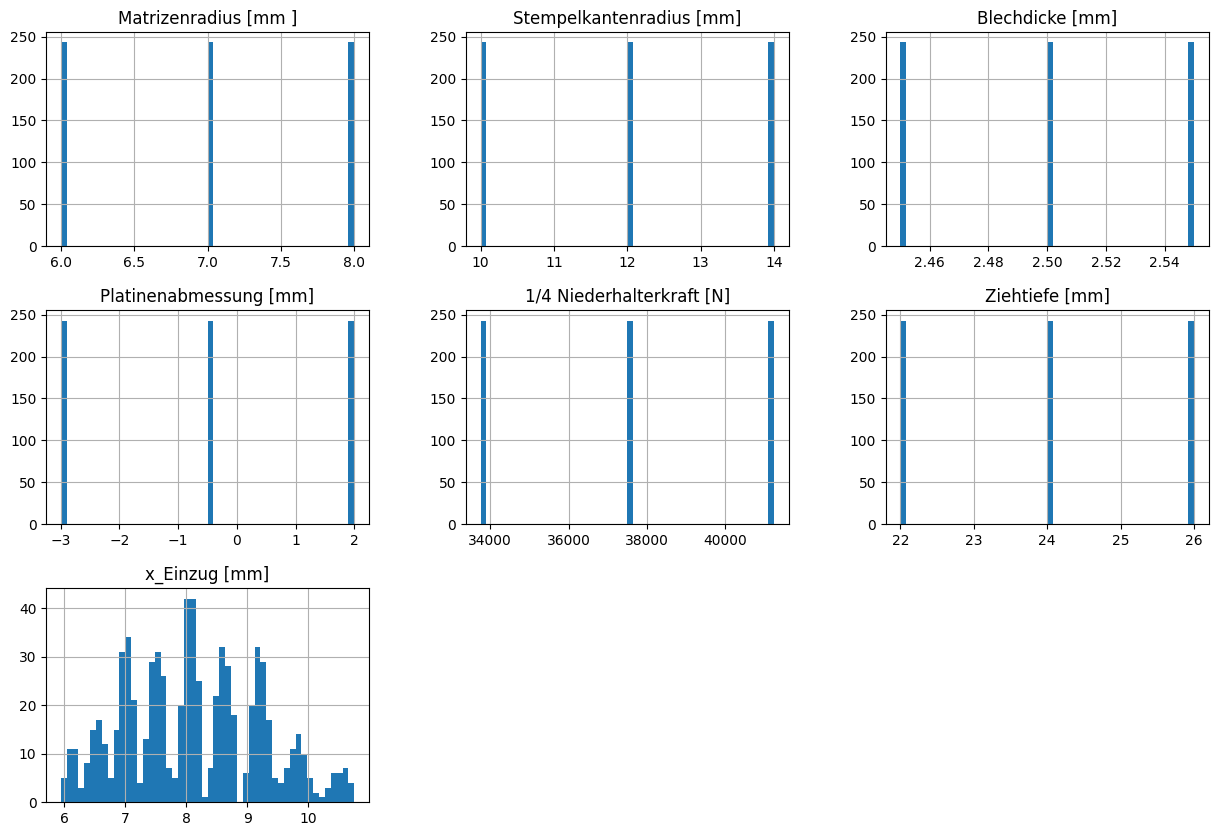

In [3]:
import matplotlib.pyplot as plt

#have a look at the data distribution
df.hist(bins = 50, figsize= (15,10))
plt.show

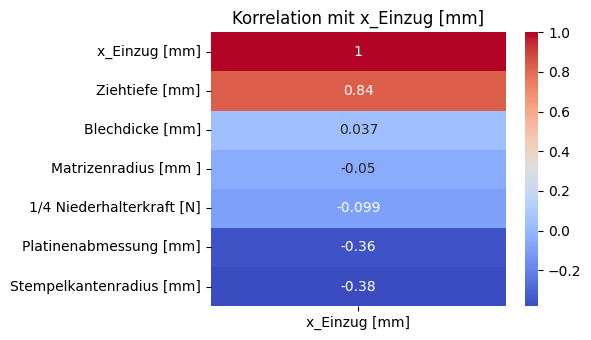

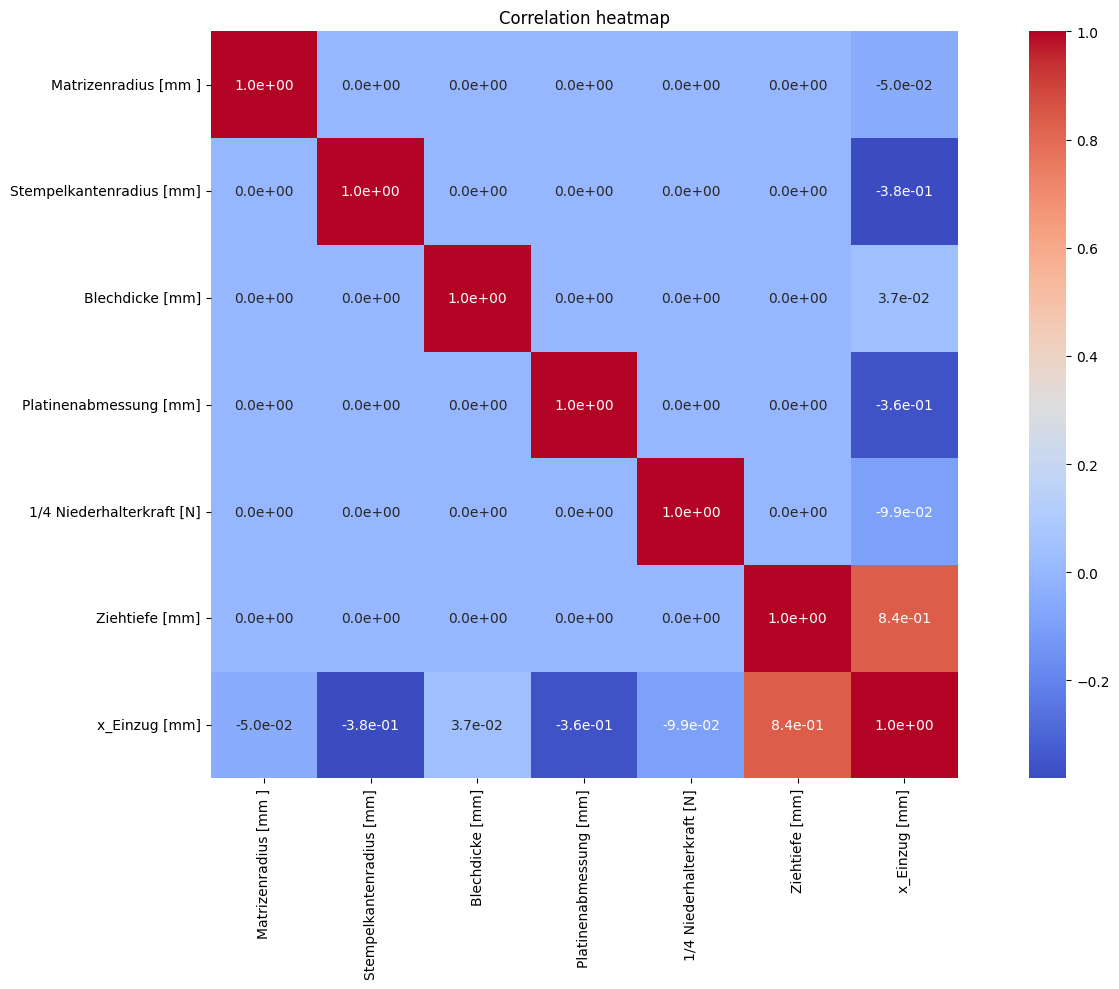

In [4]:
from pandas.plotting import scatter_matrix
import seaborn as sns

target_attr = 'x_Einzug [mm]'

corr_matrix = df.corr(method = 'spearman') #Pearson correlation, assumption relationship is linear
#get a sorted correlation matrix
sorted_corr = corr_matrix[target_attr].sort_values(ascending=False)

#plot figure for the correlation with the target
plt.figure(figsize = (6, len(sorted_corr) * 0.5))
sns.heatmap(sorted_corr.to_frame(), annot= True, cmap = 'coolwarm', cbar = True)
plt.title(f'Korrelation mit {target_attr}')
plt.tight_layout()
plt.show()

#plot full correlation heatmap
plt.figure(figsize=(15 , 10))
sns.heatmap(corr_matrix, annot=True, fmt= '.1e', cmap='coolwarm', cbar=True, square=True)
plt.title("Correlation heatmap")
plt.tight_layout()
plt.show()



Transformation Pipeline

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler


#get the numerical features
data_num = df.drop('x_Einzug [mm]', axis = 1)
#get the target values
data_labels = df['x_Einzug [mm]'].to_numpy()

#three different pipelines for preprocessing the data
#pipeline 1 is used

#Standard Scaler for distribution with 0 mean and 1 std., normal distributed data
data_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

#scales data according to median and Interquartildistance, for data with many outliers
data_pipeline1 = Pipeline([
    ('rob_scaler', RobustScaler())
])

#min max scalling for values between 0 and 1 (Normalization)
data_pipeline2 = Pipeline([
    ('Min_Max_Scaler', MinMaxScaler())
])

data_prep = data_pipeline.fit_transform(data_num)
# data_prep1 = data_pipeline1.fit_transform(data_num)
# data_prep2 = data_pipeline2.fit_transform(data_num)
# print(data_prep[:30])
# print(data_prep1[:30])
# print(data_prep2[:30])



[[ 0.         -1.22474487 -1.22474487  1.22474487  0.          0.        ]
 [ 0.          0.         -1.22474487  0.         -1.22474487  1.22474487]
 [ 1.22474487  1.22474487  0.         -1.22474487  1.22474487  1.22474487]
 [ 0.          1.22474487  0.          1.22474487  1.22474487  1.22474487]
 [-1.22474487  0.          1.22474487  1.22474487 -1.22474487  0.        ]]
[8.089  9.288  9.06   8.0435 7.678 ]


3 Split Method


*   one model for training in regression predicitons
*   one model to learn the error between prediction and true value




[[ 0.          1.22474487  1.22474487  1.22474487 -1.22474487  1.22474487]
 [-1.22474487  1.22474487 -1.22474487 -1.22474487 -1.22474487 -1.22474487]
 [ 1.22474487  0.          0.          0.         -1.22474487  1.22474487]
 [ 1.22474487  0.          1.22474487  0.          1.22474487  0.        ]
 [ 0.          0.          0.          1.22474487  0.         -1.22474487]]
[8.2525 7.019  9.246  7.922  6.623 ]


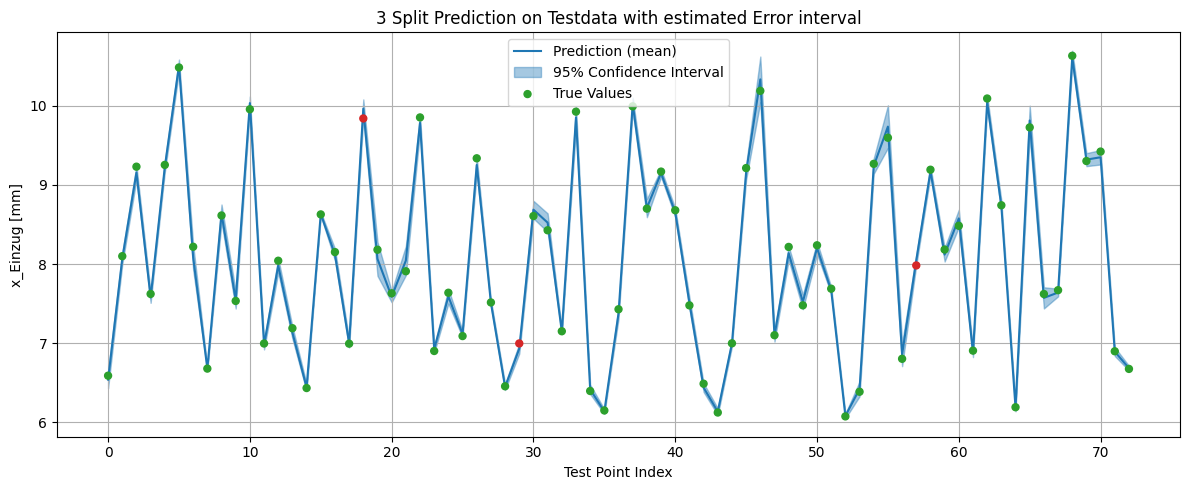

In [16]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

#split the data into 3 splits 45% / 45% / 10% according to Paper Tavazza et al.

X_temp, X_test, y_temp, y_test = train_test_split(data_prep, data_labels, test_size= 0.1, random_state=42)
X_train, X_val1, y_train, y_val1 = train_test_split(X_temp, y_temp, test_size= 0.5, random_state=42)
print(X_train[:5])
print(y_train[:5])

# One model for predicting the target value
reg_model = RandomForestRegressor(n_estimators= 100, random_state=42)
reg_model.fit(X_train, y_train)

#make predicitons and calculate the absolute error on val1
y_val1_pred = reg_model.predict(X_val1)
error_val1 = np.abs(y_val1 - y_val1_pred)

#one model to learn the error
error_model = RandomForestRegressor(n_estimators= 100, random_state=42)
error_model.fit(X_val1, error_val1)

#make predictions with both models on test data
test_pred = reg_model.predict(X_test)
test_error = error_model.predict(X_test)

lower_bound = test_pred - 2*test_error
upper_bound = test_pred + 2*test_error

# Check whether each true value lies within the 95% confidence interval
# If yes, the point will be green; if not, red
in_interval = (y_test >= lower_bound) & (y_test <= upper_bound)
colors = ['tab:green' if inside else 'tab:red' for inside in in_interval]

# Plotting the prediction with uncertainty and true values
plt.figure(figsize=(12, 5))
x_axis = np.arange(len(X_test))

# Plot predicted mean
plt.plot(x_axis, test_pred, label="Prediction (mean)", color='tab:blue')

# Shade the 95% confidence interval (±2 standard deviations)
plt.fill_between(x_axis, lower_bound, upper_bound,
                 alpha=0.4, color='tab:blue', label='95% Confidence Interval')

# Plot true target values as orange dots
plt.scatter(x_axis, y_test, label="True Values", c=colors, s=25, zorder=3)

# Add plot labels and formatting
plt.title("3 Split Prediction on Testdata with estimated Error interval")
plt.xlabel("Test Point Index")
plt.ylabel("x_Einzug [mm]")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()